# **Project: Analyzing the Retail Data Using Python Programming**

### Authors: Sarita Poudyal Bhandari, Dorothy Arriola Flores, Issac  Nasiah
### Class: COMSC 230-Principles of Programming Languages
### Advisor: Omar Rivera Morales

### **Project Overview**

In this project we have worked with the online retail data set, a transactional dataset of UK based registered online retail stores.  The task of the data is classification and clustering, it has 541909 instances.  It is a multivariate, sequential and time-series data and has integer and real data values. It does have any missing values. This dataset has eight attributes which are described below:



*   The task of the data is classification and clustering, it has 541909 instances and eight attributes.
*  It is a multivariate, sequential and time-series data and has integer and real data values. It does have missing values.

*  The data is taken from UCI Machine Learning Repository.
*  We are using different models to find the trend of the data.







### **Project Objectives**

The main goal is to find out the pattern of the sales in different countries and compare the results based on exploratory data analysis on the given retail data. Different tools will be utilized such as joint plot, boxplot, pairplot, and heatmap. 



### **Data Source**

UCI Machine Learning Repository:  https://archive.ics.uci.edu/ml/datasets/online+retail



### **Data Features**
The attributes are as follows:

- InvoiceNo : Invoice number of every transaction.
- StockCode : Code of the merchandise
- Description : Description of the  merchandise(for eg: Coat Hanger,Napkins)
- Quantity : Quantity of the each items that were sold.
- InvoiceDate : The timeframe of the transaction is between 01/12/2010 to 09/12/2011.
- UnitPrice : Unit Price of the items.
- CustomerId : Customer identification number.
- Country : The country of the data collection.

### **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression


###  **Loading/Extracting Data**

In [ ]:
path ="/content/drive/MyDrive/Principles_of_Programming_Languages/Data/"
data = pd.read_csv(path+"OnlineRetail.csv")
 
data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [ ]:
#path ="/content/drive/My Drive/Principles_of_programming_languages/"
#data = pd.read_csv(path+"Online_Retail.csv")
 
#data



### **Data Exploration**

In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=541909, step=1)

In [ ]:
print(data.head())
print(data.tail())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  
       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### **Handeling Missing Values**

In [ ]:
data.isnull().sum() 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Remarks:** 

- There are several missing values, especially in Description and CustomerID.


In [ ]:
data_clean = data.dropna(how = "any", axis = 0)


#data_clean = data.dropna(axis = 0, inplace = True)


**Remarks:** we dropped rows consisting missing values.

In [ ]:
data_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


**Remarks** Data set size is now significantly reduced.

### **Data Filtering**

In [ ]:
data_selected = data_clean[['InvoiceDate', 'Country', 'Description', 'Quantity', 'UnitPrice'] ]
data_selected

,InvoiceDate,Country,Description,Quantity,UnitPrice
0,12/1/10 8:26,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,12/1/10 8:26,United Kingdom,WHITE METAL LANTERN,6,3.39
2,12/1/10 8:26,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,12/1/10 8:26,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,12/1/10 8:26,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39
...,...,...,...,...,...
541904,12/9/11 12:50,France,PACK OF 20 SPACEBOY NAPKINS,12,0.85
541905,12/9/11 12:50,France,CHILDREN'S APRON DOLLY GIRL,6,2.10
541906,12/9/11 12:50,France,CHILDRENS CUTLERY DOLLY GIRL,4,4.15
541907,12/9/11 12:50,France,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15


### **Changing Index**

- Making InvoiceDate as the index of the data

In [ ]:
data_selected.set_index('InvoiceDate', inplace = True)
data_selected

,Country,Description,Quantity,UnitPrice
InvoiceDate,,,,
12/1/10 8:26,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
12/1/10 8:26,United Kingdom,WHITE METAL LANTERN,6,3.39
12/1/10 8:26,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
12/1/10 8:26,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
12/1/10 8:26,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39
...,...,...,...,...
12/9/11 12:50,France,PACK OF 20 SPACEBOY NAPKINS,12,0.85
12/9/11 12:50,France,CHILDREN'S APRON DOLLY GIRL,6,2.10
12/9/11 12:50,France,CHILDRENS CUTLERY DOLLY GIRL,4,4.15


### **Selecting Data Based on Smaller Unit Price**

In [ ]:
small_price_data = data_selected[data_selected['UnitPrice'] <= 5]
small_price_data

,Country,Description,Quantity,UnitPrice
InvoiceDate,,,,
12/1/10 8:26,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
12/1/10 8:26,United Kingdom,WHITE METAL LANTERN,6,3.39
12/1/10 8:26,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
12/1/10 8:26,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
12/1/10 8:26,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39
...,...,...,...,...
12/9/11 12:50,France,PACK OF 20 SPACEBOY NAPKINS,12,0.85
12/9/11 12:50,France,CHILDREN'S APRON DOLLY GIRL,6,2.10
12/9/11 12:50,France,CHILDRENS CUTLERY DOLLY GIRL,4,4.15


### **Group by Country**

#### **Average unit price of cheaper products by country**

In [ ]:
mean_data_by_country = small_price_data.groupby('Country').mean()
mean_data_by_country

,Quantity,UnitPrice
Country,,
Australia,73.450998,2.016034
Austria,13.386431,2.026165
Bahrain,19.230769,2.796154
Belgium,12.894493,2.008991
Brazil,15.789474,2.360526
Canada,19.948905,1.740803
Channel Islands,16.213235,2.005607
Cyprus,12.146939,2.399571
Czech Republic,20.379310,1.660345


In [ ]:
mean_data_by_country.sort_values(by = 'UnitPrice', ascending= False, inplace = False)



,Quantity,UnitPrice
Country,,
Bahrain,19.230769,2.796154
Lebanon,10.407407,2.621852
RSA,7.200000,2.556667
Lithuania,19.250000,2.549688
European Community,10.340909,2.525000
Malta,8.742574,2.423366
Cyprus,12.146939,2.399571
Brazil,15.789474,2.360526
Italy,12.194222,2.292713


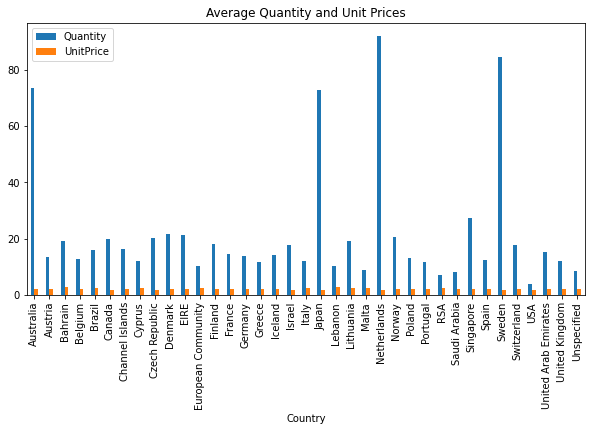

In [ ]:
mean_data_by_country.plot(kind = 'bar', figsize = (10, 5), title = "Average Quantity and Unit Prices")

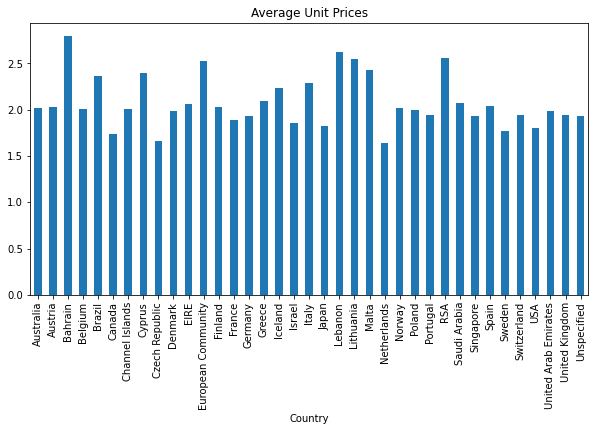

In [ ]:

mean_data_by_country['UnitPrice'].plot(kind = 'bar', figsize = (10, 5), title = "Average Unit Prices")

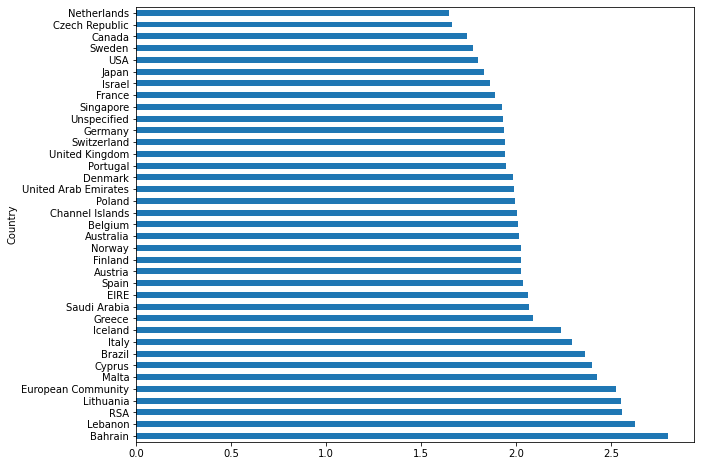

In [ ]:
mean_data_by_country_sorted = mean_data_by_country.sort_values(by = 'UnitPrice', ascending= False)

mean_data_by_country_sorted['UnitPrice'].plot(kind = 'barh', figsize = (10, 8))

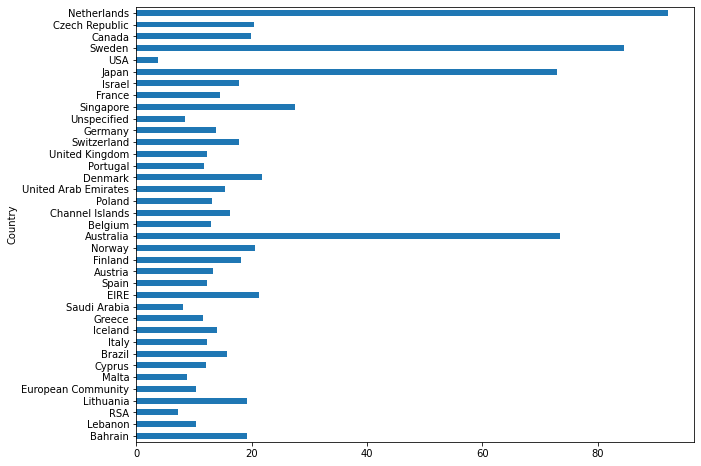

In [ ]:


mean_data_by_country_sorted['Quantity'].plot(kind = 'barh', figsize = (10, 8))

## Looking for Relationships Between Average Quantity and Average Unit Price

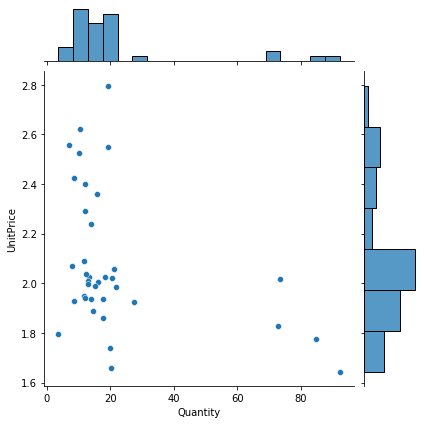

In [ ]:
sns.jointplot(mean_data_by_country['Quantity'], mean_data_by_country['UnitPrice'])


### **Fitting Regression Model in Averages**

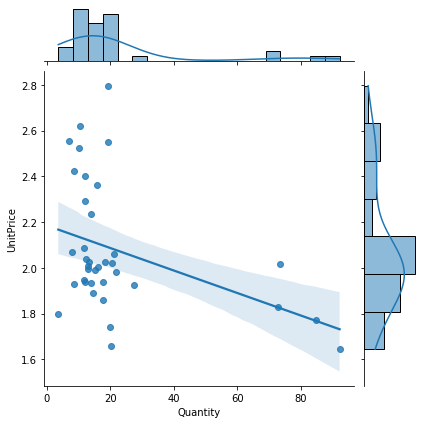

In [ ]:
sns.jointplot(mean_data_by_country['Quantity'], mean_data_by_country['UnitPrice'],  kind="reg")

In [ ]:
sns.jointplot(mean_data_by_country['UnitPrice'], mean_data_by_country['Quantity'],  kind="reg")

## **Statistical Analysis and Hypothesis Tesing for Retail Price of France and UK**

In [ ]:
data_uk =  data[data['Country'] == 'United Kingdom' ]
print(data_uk)

data_france = data[data['Country'] == 'France' ]
print(data_france)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

          InvoiceDate  UnitPrice  CustomerID         Country  
0        12/

## Test of Assumptions for Hypothes Tesing

In [ ]:
data_france["UnitPrice"].var()

6385.468362407544

In [ ]:
data_uk["UnitPrice"].var()

9863.556291083405

Remarks: Variances are not equal

## Two Sample Hypothesis Test

Null Hypothesis $H_0$: $\mu_1 =  \mu_2$: The average unit price of United Kingdom and France is the same.

Alternative Hypothesis $H_a$: $\mu_1 \neq \mu_2$. The is a significant difference in the unit prices of UK and France



## Drawing samples of size = 1000


In [ ]:
sample_data_france = data_france["UnitPrice"].sample(n = 1000)

sample_data_uk = data_uk["UnitPrice"].sample(n= 1000)

print(sample_data_france)
print(sample_data_uk)

323063    18.00
314929     1.65
305270     2.10
189616     1.25
82104      2.95
          ...  
479290     0.85
432305     0.65
19845      2.95
180363     8.25
458130     1.25
Name: UnitPrice, Length: 1000, dtype: float64
444353    0.79
472346    2.95
197131    5.79
370445    5.79
490883    2.46
          ... 
245914    9.95
123820    3.75
149026    0.65
472872    1.55
197496    2.55
Name: UnitPrice, Length: 1000, dtype: float64


In [ ]:
import scipy
print(scipy.stats.ttest_ind(sample_data_france, sample_data_uk, equal_var = False))

Ttest_indResult(statistic=-1.4073189763546077, pvalue=0.1595359866832134)


Remarks: 

- Pvalue = 0.159535 > 0.05 ($\alpha$)

- We need accept the Null hypothesis. That means there is no significant difference in the unit prices of UK and France products.




Project Summary

-
Initially, we imported the data and performed initial exploration on the data.
-
After getting some insights we cleaned the data(dropped the rows with missing values).
-
We selected the only the important attributes and for the further analysis.
Our focus was to analyze the unit price which is less or equal to 5.
-
We grouped the data based on countries using the mean aggregation function.
 The  regression graph present the relation of the unitprice and quantity based on grouped data.
-
The statistical test(t-test) tells us that the p-value(also called null hypothesis significance test) is greater than the alpha (0.05). That concludes that we cannot reject the null hypothesis. 
-
The price of merchandise  between two countries, United Kingdom and France is not significantly different. But the merchandise which are cheap in terms of unit price are sold more compared to the items that has expensive unit price. 





## **References** 
1. https://archive.ics.uci.edu/ml/datasets/online+retail

2. Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK